<a href="https://colab.research.google.com/github/kavyabalaguru/Time-series-analysis-on-google-stock-price/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING PACKAGES**

In [ ]:
!pip install pmdarima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.5MB 17.1MB/s 
     |████████████████████████████████| 2.1MB 40.9MB/s 
     |████████████████████████████████| 9.5MB 53.7MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


**READING DATASET AND CREATING DATAFRAME**

 Here the dataset is collected from yahoo finance using pandas subpackage and dataframe is created.

In [ ]:
import pandas_datareader as web
data= web.DataReader('GOOGL', data_source='yahoo', start='2015-01-15', end='2021-1-15')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-15,509.750000,502.010010,508.890015,504.010010,2553400,504.010010
2015-01-16,510.850006,503.089996,503.149994,510.459991,2482900,510.459991
2015-01-20,515.609985,509.369995,512.770020,509.940002,2339800,509.940002
2015-01-21,521.849976,509.589996,510.839996,520.390015,2317800,520.390015
2015-01-22,538.840027,521.909973,523.000000,537.299988,2803400,537.299988
...,...,...,...,...,...,...
2021-01-11,1784.380005,1752.140015,1777.020020,1756.290039,1740600,1756.290039
2021-01-12,1767.900024,1716.380005,1745.359985,1737.430054,1476400,1737.430054
2021-01-13,1756.390015,1727.319946,1727.319946,1747.250000,1171600,1747.250000


In [ ]:
df_google=pd.DataFrame(data['Close'],index=data.index)

**CHECKING FOR MISSING VALUES**

   Since dataset is indexed with date column, reindexing is not necessary and we check for missing values.

In [ ]:
df_google.isnull().sum()

Close    0
dtype: int64

**DATA VISUALIZATION**

Closing price column is visualized using pyplot. 

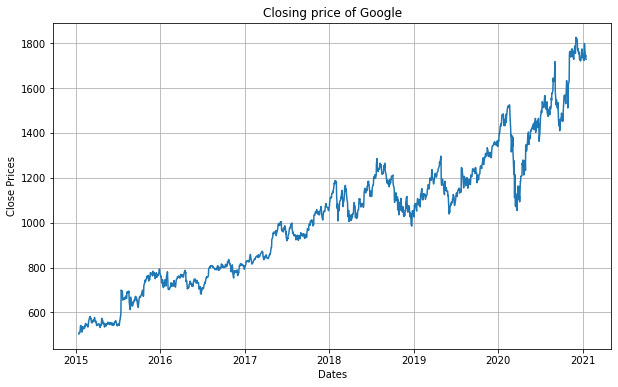

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df_google['Close'])
plt.title("Closing price of Google")
plt.show()

**CHECKING FOR STATIONARY OF DATA**

Stationary of time series is analyzed using Augmented Dickey Fuller test.

In [ ]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as st
values=df_google['Close']
result=st.adfuller(values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.526459
p-value: 0.886749
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


As a result, test statistic is higher than any of the critical values i.e., p-value is above 0.05. So we accept the null-hypothesis and the time series is infact non-stationary.

**TIME SERIES DECOMPOSITION** 

It is to separate seasonality and trend from series.

Date
2015-01-15    1.005043
2015-01-16    1.006077
2015-01-20    1.004468
2015-01-21    1.004145
2015-01-22    0.999938
                ...   
2021-01-11    1.000173
2021-01-12    1.003600
2021-01-13    1.000660
2021-01-14    1.000879
2021-01-15    0.999899
Name: seasonal, Length: 1512, dtype: float64

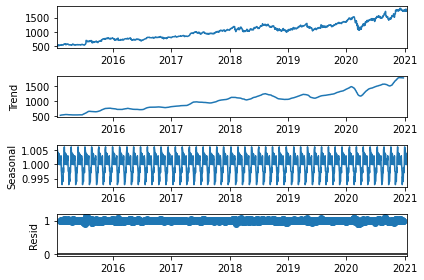

In [ ]:
decompose_result = seasonal_decompose(df_google, model="multiplicative", freq=30)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot()
seasonal

**HANDLING VARIANCE**

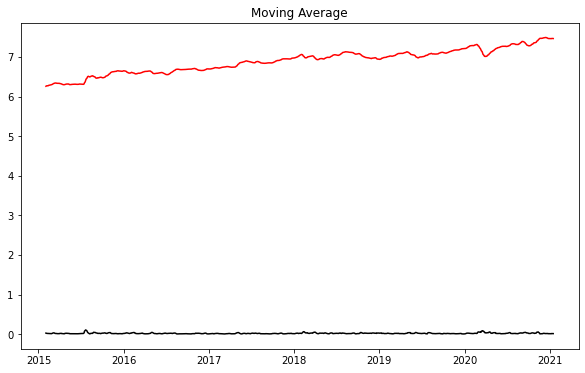

In [ ]:
plt.figure(figsize=(10,6))
df_log = np.log(df_google)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.show()

**SPLITING DATA INTO TRAINING AND TESTING**

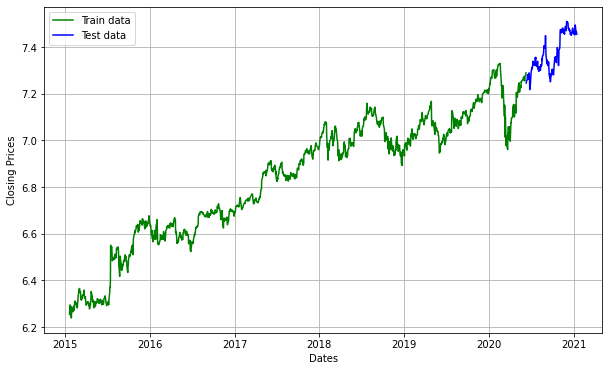

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

**USING AUTO-ARIMA MODEL** 

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3,
                      m=1,              
                      d=1,           
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7245.570, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7254.261, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7254.105, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7244.742, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-7252.275, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7252.272, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7249.994, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7252.912, Time=0.26 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.352 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1357
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3630.130
Date:                Sun, 04 Apr 2021   AIC                          -7254.261
Time:                       

In [ ]:
train_data.shape

(1356, 1)

In [ ]:
test_data.shape

(152, 1)

**PREDICTIONS** 

In [ ]:
prediction=pd.DataFrame(model_autoARIMA.predict(n_periods=152), index=test_data.index)
prediction.columns=['predicted_prices']
prediction

,predicted_prices
Date,
2020-06-11,7.289463
2020-06-12,7.290281
2020-06-15,7.291032
2020-06-16,7.291788
2020-06-17,7.292545
...,...
2021-01-11,7.400688
2021-01-12,7.401444
2021-01-13,7.402201


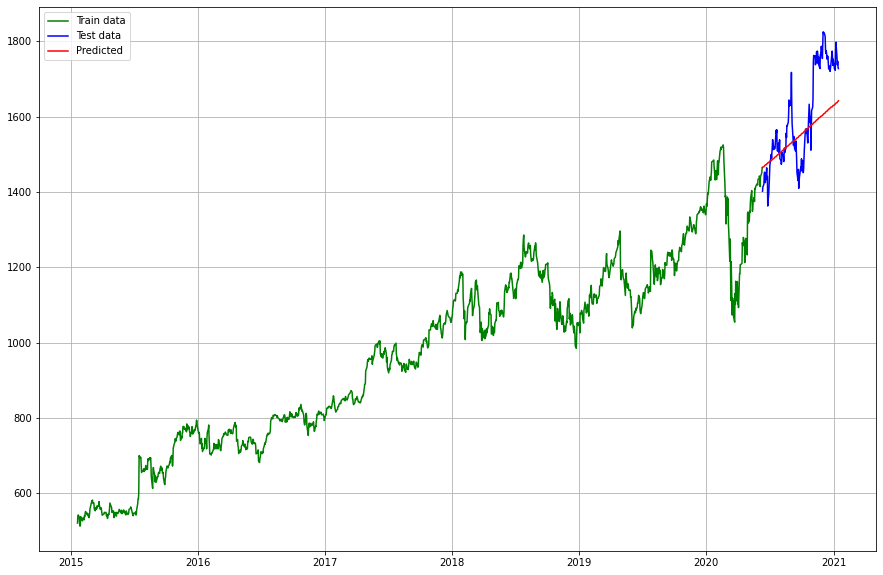

In [ ]:
prediction_exp=np.exp(prediction)
train_exp=np.exp(train_data)
test_exp=np.exp(test_data)
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(train_exp, 'green', label='Train data')
plt.plot(test_exp, 'blue', label='Test data')
plt.plot(prediction_exp, 'red',label='Predicted')
plt.legend(loc ='Left corner')
plt.show()

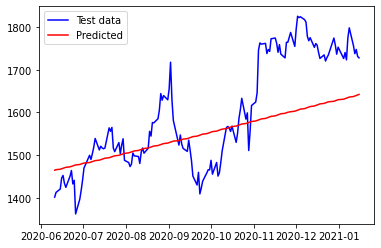

In [ ]:
plt.plot(test_exp, 'blue', label='Test data')
plt.plot(prediction_exp, 'red',label='Predicted')
plt.legend(loc ='Left corner')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
# report performance
mse = mean_squared_error(test_data, prediction)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, prediction)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(test_data, prediction))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(prediction['predicted_prices'] - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

MSE: 0.0036962126545844035
MAE: 0.04941054041739943
RMSE: 0.060796485544679334
MAPE: 0.0066679371444183875


Around 0.6% MAPE(Mean Absolute Percentage Error) implies the model is about 99.4% accurate in predicting the test set observations.